In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

df=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

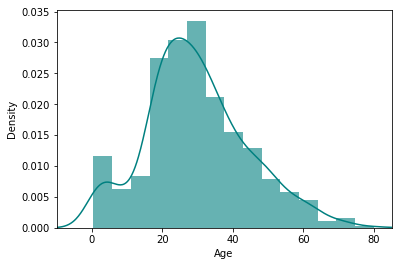

In [5]:
#age has around 20% null data
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [6]:
#age is right skewed so filling with mean doesnt makes sense better use median
df['Age'].fillna(df['Age'].median(),inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Cabin we can ignore while modelling since it has >70%null data
df.drop(['Cabin'],inplace=True,axis=1)
#for embark we have 2 null data so impute with most use
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.Embarked=df.Embarked.fillna('S')

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

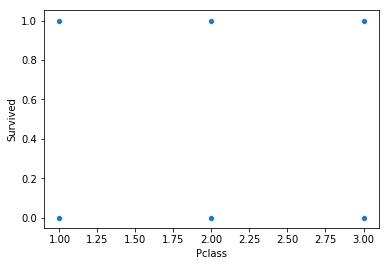

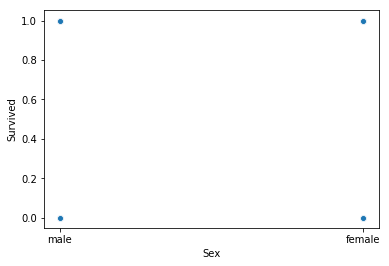

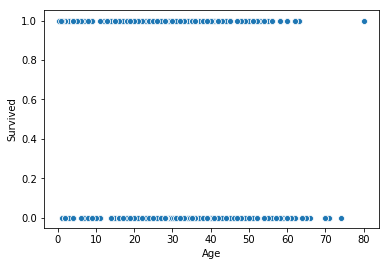

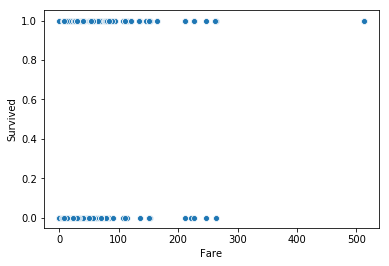

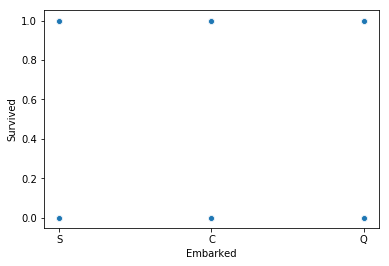

In [11]:
inde_col=['Pclass','Sex','Age','Fare','Embarked']

for i,col in enumerate(inde_col):
    plt.figure(i)
    sns.scatterplot(x=col, y="Survived", data=df)

In [12]:
df['Sex'],uniq = pd.factorize(df['Sex'])
df['Embarked'],uniq = pd.factorize(df['Embarked'])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [14]:
#passengerId Name and ticket is of no use so drop
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


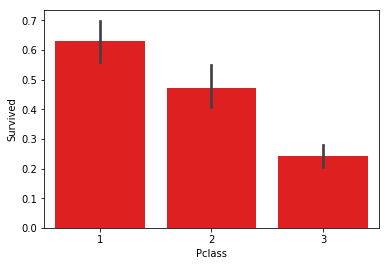

In [16]:
sns.barplot('Pclass', 'Survived', data=df, color="red")
plt.show()

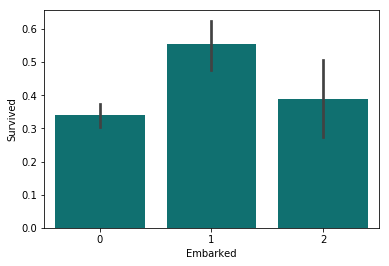

In [17]:
sns.barplot('Embarked', 'Survived', data=df, color="teal")
plt.show()

In [18]:
# we can create a new feature called single traveller if parch and sipsp is 0
df['single_travel']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)

In [19]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,single_travel
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,0
4,0,3,0,35.0,8.0500,0,1


In [21]:
y=df['Survived']
X=df.drop('Survived',axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train,y_train)

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
model.score(X_train,y_train)

0.78330658105939

In [29]:
model.score(X_test,y_test)

0.8208955223880597

In [30]:
model.coef_

array([[-1.05635731,  2.39892475, -0.03266399,  0.00325754,  0.29092511,
         0.16721786]])

In [ ]:
#pclass and sex have high degree of dependency with survival rate
#we can use other model like random forest and xgboost to improve accuracy
#also feature engineering and transformation willhave increase accuracy.